In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

### Lagrange interpolation
We can derivate lagrange's interpolation from  a Taylor's  series by exoressing  teh function at $x_1$ nd $x_2$

$$
f(x_1)=f(x)+(x_1-x)f'(x)
$$

$$
f(x_2)=f(x)+(x_2-x)f'(x)\; f(x)=p(x)
$$
$$
p(x)=\frac{x-x_2}{x_1-x_2}f(x_1)+\frac{x-x_1}{x_2-x_1}f(x_2)
$$
then we have two unkwon equation $p(x)$ and $p'(x)$, the p(x) is a linear equiation passing from x_1 to x_2, where $f(x_2)$ is afecte for the rate of $(x-x_1)(x_2-x_1) which is the distance for the point to the start over the allway, it's takes values form 0 to 1 to determinate the importance of $f(x_2)$ for our function.  

We can use more terms of Taylor's series but we need a other point($x_3$) using three points we get that p(x) is a cuadratic function with 3 coefficients $p(x)=ax²+bx+c$ which depent of $x_{1,2,3}$. if you continue adding more  points ypu will obtain the next expression:

$$
p(x)=\sum{^n_{j=1}l_{j,n}(x)f(x_j)},\; where\, n:polynomial\, order
$$
where $f(x)$ is know at the n points $x_j$ and

$$
l_{j,n}(x) = 
\frac{(x - x_1)(x - x_2)\cdots(x - x_{j-1})(x - x_{j+1})\cdots(x - x_n)}
     {(x_j - x_1)(x_j - x_2)\cdots(x_j - x_{j-1})(x_j - x_{j+1})\cdots(x_j - x_n)}
$$

denote that $l_{j,n}(x_i)$ is 1 when i and j are equal and it'll 0 when they are diferent. l function coulbe express like kronecker delta,

$$
l_{j,n}(x_i)=\delta_{i,j}
$$

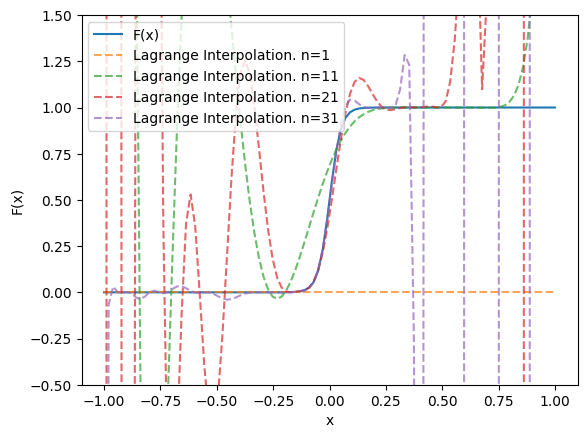

In [ ]:
####exercise 1

def F(x):
    alpha=10
    return (1+np.tanh(2*alpha*x))/2

def lagrange(x,y,n):
    p = 0
    for j in range(n):
        L = 1
        for i in range(n):
            if i!=j:
                L *= (x - y[i]) / (y[j] - y[i])
        p += L*F(y[j])

    return p
x=np.linspace(-1, 1, 100)
plt.plot(x, F(x), label='F(x)')

for n in np.linspace(1,31,4):
    xj=np.linspace(-1,1,int(n))# n values between -1 and 1, you can change this to random values
    
    # xj=np.random.uniform(-1, 1, int(n))  # Random values between -1 and 1 note that this afectes the interpolation is important the points that you choose
    plt.plot(x, [lagrange(i, xj, int(n)) for i in x], linestyle="--",alpha=0.7, label='Lagrange Interpolation. n='+str(int(n)))
plt.xlabel('x')
plt.ylabel('F(x)')
plt.ylim(-0.5, 1.5)
plt.legend()